In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


In [2]:
draw =pd.read_excel('/Volumes/WDC_internal/Users/bell/in_and_outbox/Ongoing_Analysis/M2_IntegratedTemp/ht_anomaly_M2/M2_htcontent_anom.xlsx',
                  sheet_name='all_incl_2018prawler',parse_dates=['time'], index_col='time')


In [3]:
class Timeseries1varPlot(object):

    mpl.rcParams['svg.fonttype'] = 'none'
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['pdf.fonttype'] = 42

    def __init__(self, fontsize=10, labelsize=10, plotstyle='k-.', stylesheet='bmh'):
        """Initialize the timeseries with items that do not change.

        This sets up the axes and station locations. The `fontsize` and `spacing`
        are also specified here to ensure that they are consistent between individual
        station elements.

        Parameters
        ----------
        fontsize : int
            The fontsize to use for drawing text
        labelsize : int
          The fontsize to use for labels
        stylesheet : str
          Choose a mpl stylesheet [u'seaborn-darkgrid', 
          u'seaborn-notebook', u'classic', u'seaborn-ticks', 
          u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', 
          u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', 
          u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', 
          u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', 
          u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', 
          u'seaborn-dark-palette']
        """

        self.fontsize = fontsize
        self.labelsize = labelsize
        self.plotstyle = plotstyle
        plt.style.use(stylesheet)

    @staticmethod
    def add_title(mooringid='',lat=-99.9,lon=-99.9,depth=9999,instrument=''):
      """Pass parameters to annotate the title of the plot

      This sets the standard plot title using common meta information from PMEL/EPIC style netcdf files

      Parameters
      ----------
      mooringid : str
        Mooring Identifier
      lat : float
        The latitude of the mooring
      lon : float
        The longitude of the mooring
      depth : int
        Nominal depth of the instrument
      instrument : str
        Name/identifier of the instrument plotted
      """  

      ptitle = ("Plotted on: {time:%Y/%m/%d %H:%M} \n from {mooringid} Lat: {latitude:3.3f}  Lon: {longitude:3.3f}" 
            " Depth: {depth}\n : {instrument}").format(
            time=datetime.datetime.now(), 
                  mooringid=mooringid,
                  latitude=lat, 
                  longitude=lon, 
                  depth=depth,
                  instrument=instrument )

      return ptitle

    def plot(self, xdata=None, ydata=None, ylabel=None, **kwargs):
      fig = plt.figure(1,figsize=(11,4.25))
      ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
      p1 = ax1.plot(xdata, ydata, self.plotstyle, markersize=2)
      ax1.set_ylim([np.nanmin(ydata),np.nanmax(ydata)])
      ax1.set_xlim([np.nanmin(xdata),np.nanmax(xdata)])
      plt.ylabel(ylabel)

    
      ax1.xaxis.set_major_locator(YearLocator())
      ax1.xaxis.set_minor_locator(YearLocator(2, month=7, day=1))
      ax1.xaxis.set_major_formatter(ticker.NullFormatter())
      ax1.xaxis.set_minor_formatter(DateFormatter('%Y'))
      ax1.xaxis.set_ticks_position('bottom')
      ax1.yaxis.set_ticks_position('both')
      ax1.tick_params(axis='both', which='minor', labelsize=self.labelsize)

      return plt, fig

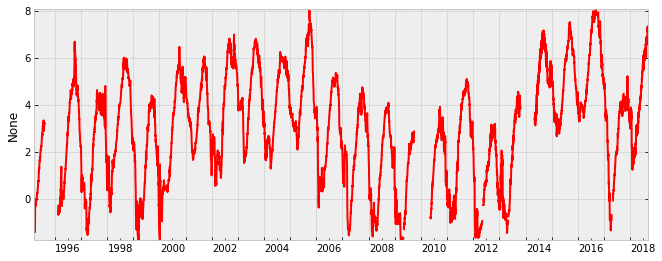

In [4]:
p1 = Timeseries1varPlot(plotstyle='r-')

dr = draw.resample('6h').mean()
temp = np.array([x.toordinal() for x in dr.index])    
plt1, fig1 = p1.plot(xdata=temp, 
                     ydata=dr['V00_1900_depthint'].values)

In [42]:
data = pd.read_csv('/Volumes/WDC_internal/Users/bell/ecoraid/2018/Moorings/18mtp1a/raw_converted/sbe26/18mtp1a_narr_apress.orig.tid','\s+',
                   skiprows=1,names=['date','time','psia','degC'])

In [43]:
data = data.set_index(pd.DatetimeIndex(data['date']+' '+data['time']))
data.drop(['date','time'],1,inplace=True)
data.index=data.index.round('15min',inplace=True)

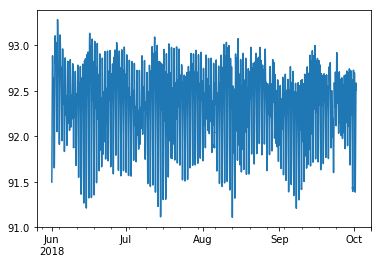

In [60]:
data['psia']['2018-06-01':'2018-10-01'].plot()

In [3]:
data = pd.read_csv('/Users/bell/in_and_outbox/2018/stabeno/nov/m8_winds/NARR_M8_UVAT_1980-2018.csv',
                   skiprows=[1],parse_dates=['time'],index_col='time')

In [18]:
interval = 5

for year in range(1980,2019,1):
    for i in range(0,12,1):
        doystart = 304 + (i*interval)
        doyend = doystart+(interval-1)
        #for the last period of the year which overlaps with the next year
        #temp = pd.concat([data[str(year)][(data[' index'] >= doystart)] , data[str(year+1)][(data[' index'] == doyend)]]).mean()
        temp = data[str(year)][(data[' index'] >= doystart) & (data[' index'] <= doyend)].mean()
        print("{},{},{},{}".format(str(year)+str(doystart+1).zfill(3)+'_'+str(year)+str(doyend+1).zfill(3),temp[' AT_21'],temp[' WU_422'],temp[' WV_423']))

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


1980305_1980309,-0.18939819796,3.2153672119999994,-1.42756108
1980310_1980314,0.12167970999999995,-1.8983522199999996,-3.2183885919999993
1980315_1980319,1.4871948400000004,-5.153597882,-2.33084542
1980320_1980324,-1.10531616,-3.20554164,-3.7145354799999994
1980325_1980329,-4.91994018,-3.8020302400000006,-10.21199728
1980330_1980334,-4.807824640000001,2.7893978460000004,-4.063962827999999
1980335_1980339,-3.3697937199999997,-0.9775398,1.0815887199999996
1980340_1980344,-5.58185424,-7.336782791999999,-8.49430828
1980345_1980349,-14.686566,-4.01608492,-6.9245727399999994
1980350_1980354,-20.7296968,-3.38974918,-2.44007614
1980355_1980359,-16.376061999999997,-2.8178722400000003,-3.0112096399999997
1980360_1980364,-19.3761688,-0.405203949,-4.34012566
1981305_1981309,-2.76476442,1.03803429,-9.663464600000001
1981310_1981314,-0.95129394,-6.6960470999999995,-7.6093379200000015
1981315_1981319,-2.8657714772,2.5158686599999998,-6.0043561599999995
1981320_1981324,1.138958738,-7.41890808,4.048125

In [21]:
for year in range(1980,2019,1):
    for i in range(0,24,1):
        doystart = 4 + (i*interval)
        doyend = doystart+(interval-1)
        #for the last period of the year which overlaps with the next year
        #temp = pd.concat([data[str(year)][(data[' index'] >= doystart)] , data[str(year+1)][(data[' index'] == doyend)]]).mean()
        temp = data[str(year)][(data[' index'] >= doystart) & (data[' index'] <= doyend)].mean()
        print("{},{},{},{}".format(str(year)+str(doystart+1).zfill(3)+'_'+str(year)+str(doyend+1).zfill(3),temp[' AT_21'],temp[' WU_422'],temp[' WV_423']))
            

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


1980005_1980009,-12.9060486,-2.2117423799999996,-2.326757422
1980010_1980014,-21.2863618,0.8381137759999999,-4.12615048
1980015_1980019,-28.540680200000004,1.672720872,-3.554015346
1980020_1980024,-25.527118,-1.34957162,-0.835213006
1980025_1980029,-10.1766174,-1.3862358000000001,-1.58655392
1980030_1980034,-20.996405,0.639500816,-4.27763858
1980035_1980039,-24.630151599999998,0.03071786919999999,-4.519533560000001
1980040_1980044,-8.55692146,-2.8397651660000003,-1.279342274
1980045_1980049,-6.69916978,-3.0322010539999997,-1.854621792
1980050_1980054,-22.004834199999998,0.6547241616399999,-5.2293514000000005
1980055_1980059,-14.373754799999997,-0.5370218400000001,-0.027043471999999992
1980060_1980064,-13.700860599999999,-3.8887797799999992,-3.6231643399999998
1980065_1980069,-4.47166132,-4.22430888,-1.11824219
1980070_1980074,-16.872476,-0.7416033995999998,-2.483684846
1980075_1980079,-18.502969200000003,-3.6628186200000004,-3.24241868
1980080_1980084,-8.258062599999999,-1.588456360600

In [22]:
for year in range(1980,2019,1):
    doystart = 364
    doyend = 4
    #for the last period of the year which overlaps with the next year
    temp = pd.concat([data[str(year)][(data[' index'] >= doystart)] , data[str(year+1)][(data[' index'] == doyend)]]).mean()
    print("{},{},{},{}".format(str(year)+str(doystart+1).zfill(3)+'_'+str(year+1)+str(doyend+1).zfill(3),temp[' AT_21'],temp[' WU_422'],temp[' WV_423']))
            

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


1980365_1981005,-17.26009133333333,-2.7400568333333335,-6.413479366666667
1981365_1982005,-5.473572,0.12385026999999998,0.384883835
1982365_1983005,-20.4648665,0.300170065,-3.6945381
1983365_1984005,-13.154067999999999,-2.9457606999999992,-11.6138875
1984365_1985005,-18.682637666666665,-1.0592020333333336,-4.789634966666666
1985365_1986005,-4.95481865,-5.0652963,-2.73132455
1986365_1987005,-21.795891,-1.97939492,-7.01029485
1987365_1988005,-6.109924500000001,-3.08224475,1.5391369
1988365_1989005,-11.808430999999999,-3.0853135333333337,-0.7944869999999998
1989365_1990005,-15.5171505,-4.16354475,-3.0980898
1990365_1991005,-13.27266675,-3.2267885,-3.2283801499999996
1991365_1992005,-19.497795,-3.77253625,-4.0091248
1992365_1993005,-1.6580607,-0.6914954333333334,4.393107566666667
1993365_1994005,-8.7201843,-2.5383940000000003,-1.9115066
1994365_1995005,-5.198898300000001,-6.8498875,-1.653603925
1995365_1996005,-2.7409820500000004,-3.25383582,-1.6296626000000003
1996365_1997005,-2.700887066

KeyError: '2019'